In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
import numpy as np

from src.modules import plotter as p
from src.modules.analysis import analyseValue, createScenarios, runScen

plts = []

In [5]:
runtime = pd.read_pickle("/usr/app/data/tmp/rt.pkl")
splitRuntime = pd.read_pickle("/usr/app/data/tmp/splitrt.pkl")
stateSpace = pd.read_pickle("/usr/app/data/tmp/sspace.pkl")
decisionSpace = pd.read_pickle("/usr/app/data/tmp/dspace.pkl")
totalSpace = pd.read_pickle("/usr/app/data/tmp/tspace.pkl")

# Combine spaces
space = pd.concat([stateSpace, decisionSpace, totalSpace], axis = 1)
space.reset_index(level=0, inplace=True)
space.columns = ["Parameter","State", "Decision", "Total"]
space = pd.melt(space, id_vars=["Parameter"], value_vars=["State", "Decision", "Total"]).astype({"value": int})

allVar = [("rt", runtime), ("splitrt", splitRuntime), ("space", space), ("sspace", stateSpace), ("dspec", decisionSpace), ("tspace", totalSpace)]

/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


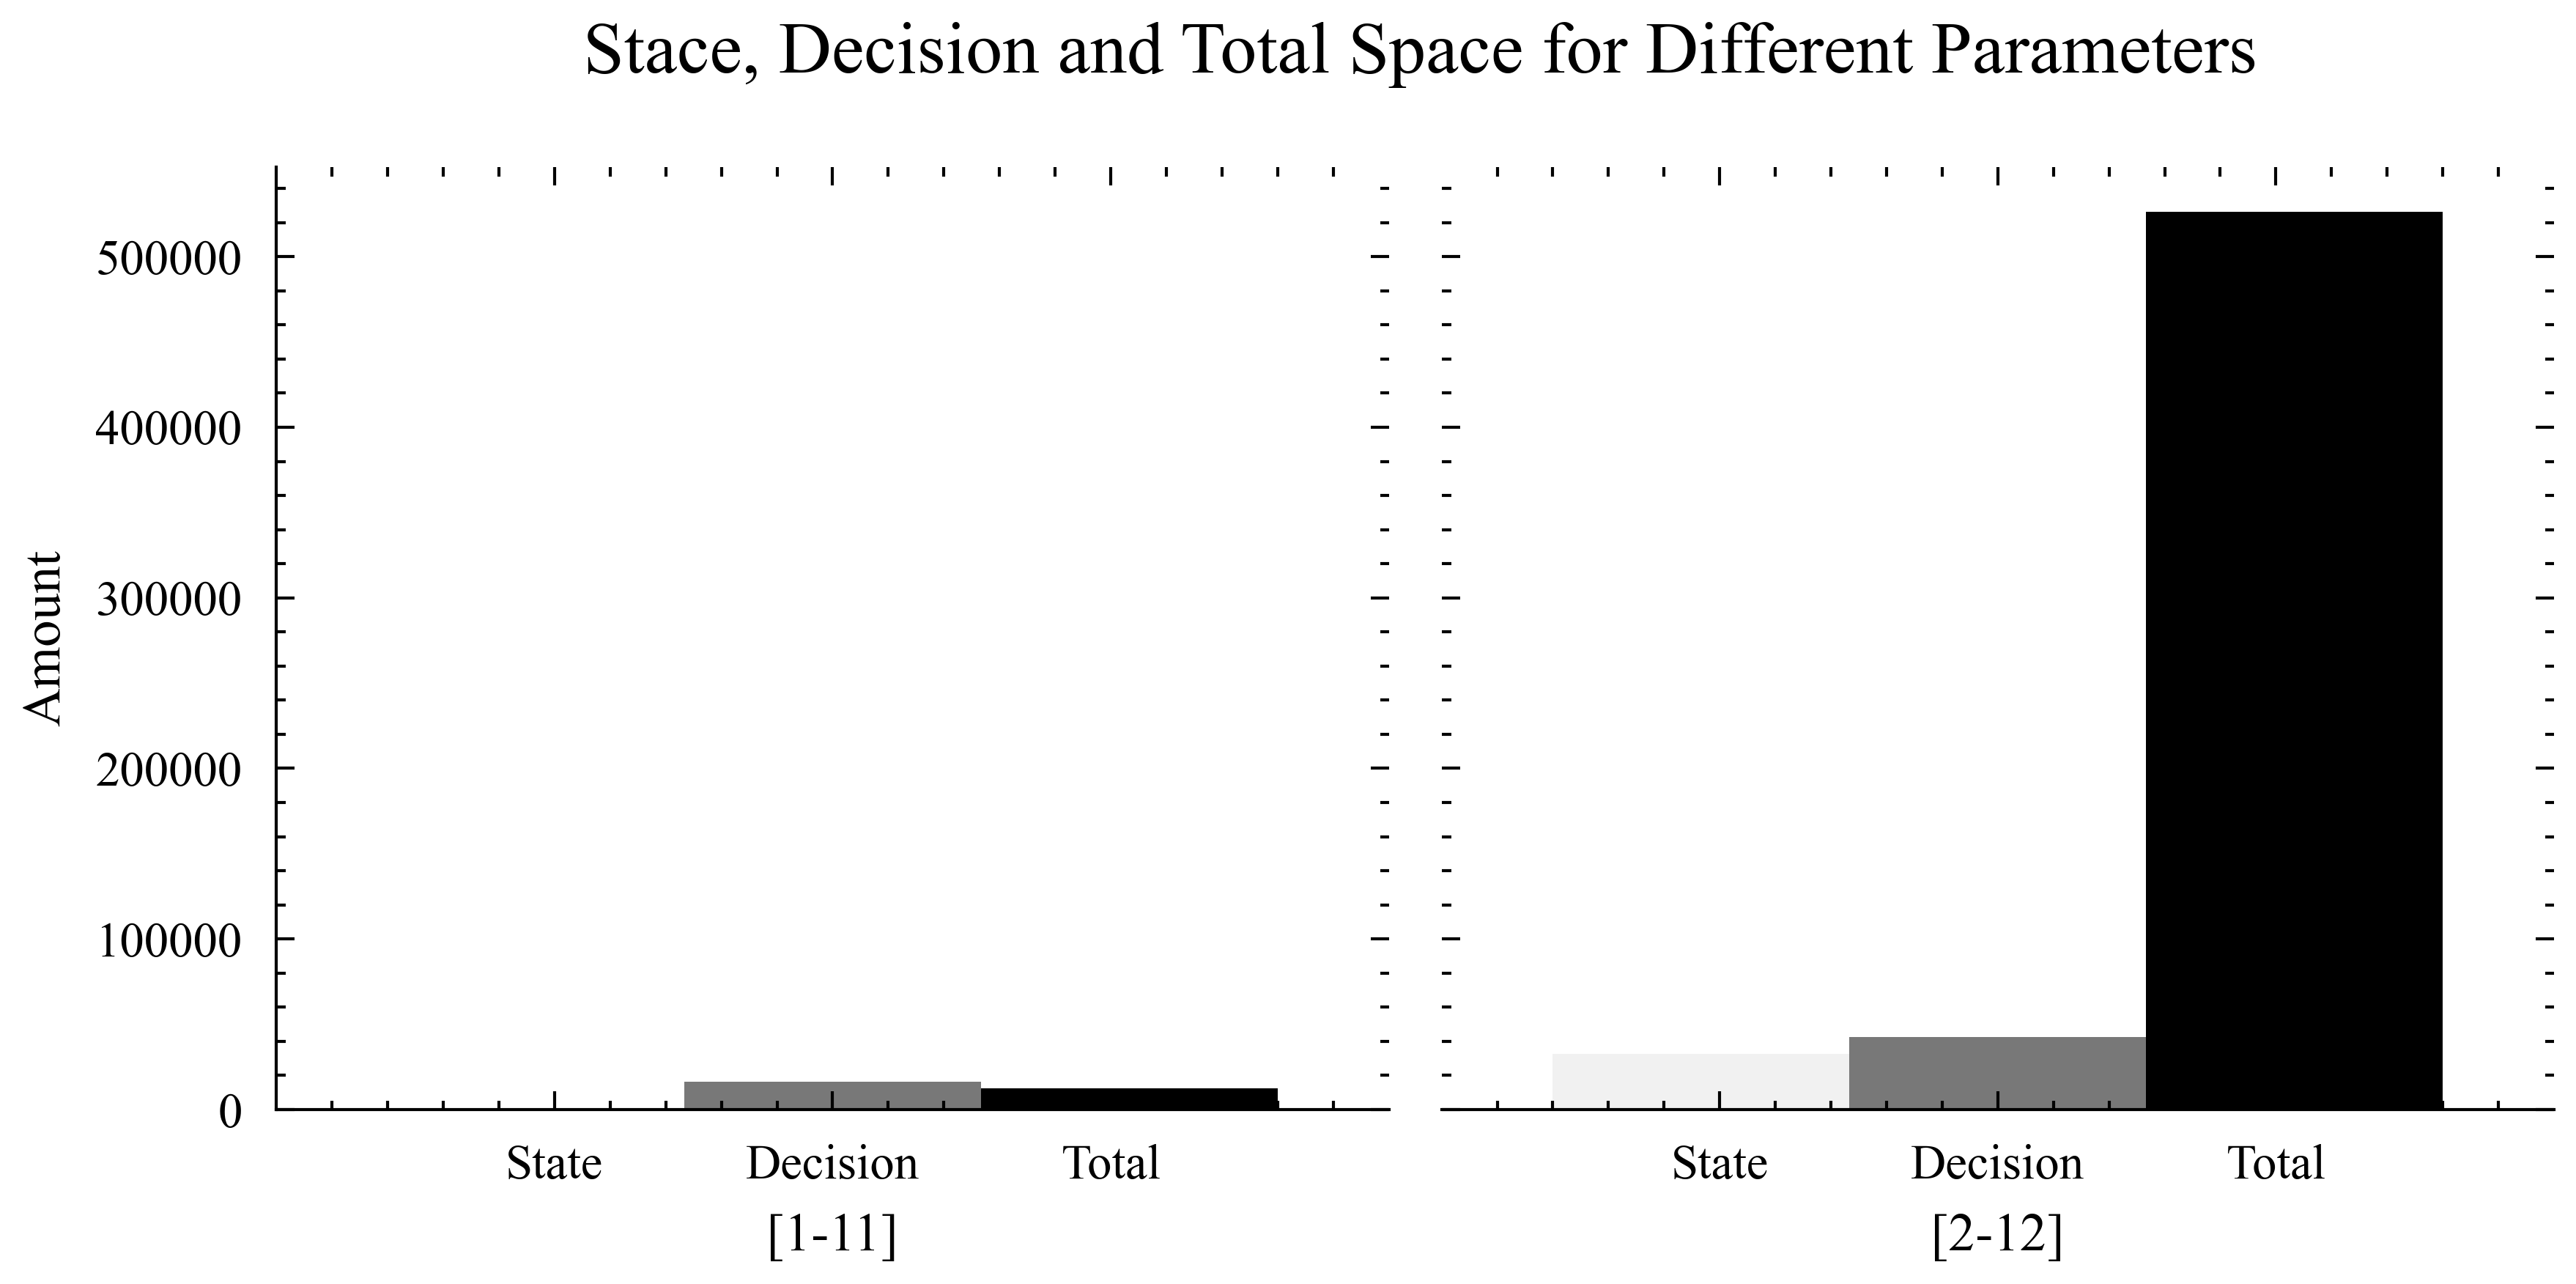

In [20]:
# 1. Space comparison
plts += [("space_comparison", p.plot_space(allVar[2]))]

In [ ]:
# 2. State/decision/total comparison

In [ ]:
# 3. Runtime comparison overall

In [ ]:
# 4. Value according to algorithm and scenario

In [ ]:
# 5. Decision with price and trip demand

In [21]:
# Export plots
for pl in plts:
    pl[1].savefig('/usr/app/output/graphics/%s.svg' % pl[0])#,transparent=True)
    pl[1].savefig('/usr/app/output/graphics/%s.png' % pl[0])#,transparent=True)